## Adım Adım Keşifçi Veri Analizi

Üzerinde çalışacağımız veri setini [salaries.ai-jobs.net](http://https://salaries.ai-jobs.net/) sitesinden çektim. Bu veri seti dünyanın birçok yerinde veri bilimi, yapay zeka, makine öğrenmesi, büyük veri, vb işlerde çalışanların, yaptığı iş, tecrübe, şirket büyüklüğü, vb. bilgileriyle birlikte yıllık ücretlerini girdiği canlı bir veri setidir.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salaries = pd.read_csv('https://salaries.ai-jobs.net/download/salaries.csv')

Gerekli kütüphaneleri içe aktarıp ilgili veri setini salaries isimli dataframe e kaydettik.

Veri setinin ilk ve son 5 gözlemine hızlıca göz atalım.

In [29]:
salaries.head()  # ilgili veri setinin ilk 5 gözlemini çıktı olarak verir.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Robotics Engineer,90000,USD,90000,US,0,US,M
1,2024,MI,FT,Robotics Engineer,70000,USD,70000,US,0,US,M
2,2024,SE,FT,Robotics Engineer,165000,USD,165000,US,0,US,M
3,2024,SE,FT,Robotics Engineer,150000,USD,150000,US,0,US,M
4,2024,SE,FT,Data Engineer,179000,USD,179000,US,0,US,M


In [30]:
salaries.tail()  # ilgili veri setinin son 5 gözlemini çıktı olarak verir.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
12954,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
12955,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
12956,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
12957,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
12958,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


Rastgele bir gözlem görüntülemek istersek:

In [5]:
salaries.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5823,2023,SE,FT,Machine Learning Engineer,172200,USD,172200,US,0,US,M


Dataframe'i bir veya birden fazla sütuna göre sıralayabiliriz.

In [6]:
salaries.sort_values(by='salary_in_usd', ascending=False).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
2831,2023,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
2837,2023,MI,FT,Machine Learning Engineer,750000,USD,750000,US,0,US,M
2233,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
1458,2024,SE,FT,Data Analyst,750000,USD,750000,US,0,US,M


In [7]:
salaries.sort_values(by=['salary_in_usd', 'company_size'], ascending=False).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
871,2024,SE,FT,Analytics Engineer,750000,USD,750000,US,0,US,M
1047,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
1458,2024,SE,FT,Data Analyst,750000,USD,750000,US,0,US,M
2233,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M


Hangi lokasyonda kaç tane şirket olduğuna bakalım.

In [8]:
salaries.groupby('company_location').size().sort_values(ascending=False).head(10)

company_location
US    11313
GB      580
CA      328
ES      125
DE       92
IN       58
FR       52
AU       37
PT       26
NL       23
dtype: int64

Gözlem sayısı ve değişken sayısını görmek istersek shape özelliğini kullanırız. Canlı bir veri seti olduğu için gözlem sayısı değişiklik gösterebilir. Çıktıyı tuple veri tipinde verecektir.

In [9]:
salaries.shape

(12959, 11)

262 gözlem ve 11 değişken sayısına sahip. Toplam değer sayısına size özelliği ile bakalım.

In [10]:
salaries.size

142549

Değişken isimlerini liste halinde de görüntüleyebiliriz.

In [11]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Değişkenlerin veri tiplerini ve eksik gözlem içerip içermediğine bakabiliriz.

In [12]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           12959 non-null  int64 
 1   experience_level    12959 non-null  object
 2   employment_type     12959 non-null  object
 3   job_title           12959 non-null  object
 4   salary              12959 non-null  int64 
 5   salary_currency     12959 non-null  object
 6   salary_in_usd       12959 non-null  int64 
 7   employee_residence  12959 non-null  object
 8   remote_ratio        12959 non-null  int64 
 9   company_location    12959 non-null  object
 10  company_size        12959 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


salary, salary_in_usd ve remote_ratio değişkenleri numerik, diğer değişkenleri object veri tipinde. Toplam 262 gözlem bulunuyor. Değişkenlerde eksik gözlem olup olmadığını varsa kaç tane eksik gözlem olduğunu tespit edebiliriz.

Sadece numerik veri tipine sahip değişkenleri gözlemleyebiliriz.

In [13]:
salaries.select_dtypes(include = [int, float]).head()

,work_year,salary,salary_in_usd,remote_ratio
0,2024,90000,90000,0
1,2024,70000,70000,0
2,2024,165000,165000,0
3,2024,150000,150000,0
4,2024,179000,179000,0


Numerik değere sahip değişkenlerin sadece isimlerine de liste halinde ulaşabiliriz.

In [14]:
salaries.select_dtypes([int, float]).columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [15]:
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Eksik gözlem bunumuyor. Eğer olsaydı 'Özellik Mühendisliği (Feature Engineering)' ile halletmemiz gerekecekti.

Şimdi toplu şekilde, veri setinin istatiksel ölçümlerine bakalım.

In [16]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,12959.0,2023.014353,0.662965,2020.0,2023.0,2023.0,2023.0,2024.0
salary,12959.0,167243.500424,379622.735584,14000.0,104000.0,142200.0,188150.0,30400000.0
salary_in_usd,12959.0,149993.336523,68336.910707,15000.0,104000.0,142000.0,185900.0,774000.0
remote_ratio,12959.0,34.111428,46.929606,0.0,0.0,0.0,100.0,100.0


**describe** fonksiyonunun çıktısı numerik veri tipindeki değişkenlerin sayım, ortalama, standart sapma, medyan ve kartilleri gibi betimsel istatiklerini verir.

Değişkenlerin kaç tane benzersiz sınıfa sahip oluğu ve bunların neler olduğuna bakalım

In [17]:
salaries['experience_level'].nunique()

4

In [18]:
salaries['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

Numerik değere sahip değişkenlerin korelasyonuna bakabiliriz.

In [19]:
salaries.corr()

C:\Users\pc\AppData\Local\Temp\ipykernel_720\3094442422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salaries.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.075873,0.112941,-0.202885
salary,-0.075873,1.000000,0.109555,0.018770
salary_in_usd,0.112941,0.109555,1.000000,-0.072754
remote_ratio,-0.202885,0.018770,-0.072754,1.000000


Tekrarlayan değerler yerine sadece ilişkili değerleri görebilmek için korelasyon matrisini üçgen matrise çevirebiliriz.

In [20]:
import numpy as np
cor = pd.DataFrame(np.tril(salaries.corr().values), index=salaries.corr().index, columns=salaries.corr().columns).round(3)
cor = cor.iloc[:,:-1]
cor.drop(cor.head(1).index, inplace=True) 
cor.replace(to_replace=[0,1], value='', inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_720\2889623111.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = pd.DataFrame(np.tril(salaries.corr().values), index=salaries.corr().index, columns=salaries.corr().columns).round(3)


In [21]:
cor

,work_year,salary,salary_in_usd
salary,-0.076,,
salary_in_usd,0.113,0.11,
remote_ratio,-0.203,0.019,-0.073


Bazen bir resim ya da grafik yüzlerce/binlerce satırlık bir tablodan daha çok şey anlatabilir. Veri görselleştirme teknikleri de Keşifçi Veri Analizinde bu yüzden sıklıkla kullanılır.

Bütün meslekleri bir arada bir grafikte gözlemleyebiliriz.

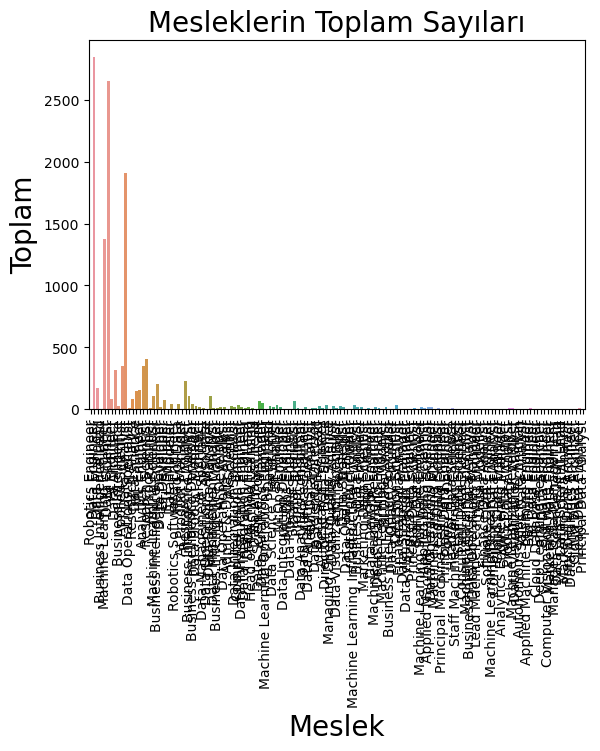

In [22]:
sns.countplot(x='job_title', data=salaries)
plt.ylabel("Toplam", size=20)
plt.xlabel('Meslek', size=20)
plt.xticks(rotation=90)
plt.title("Mesleklerin Toplam Sayıları", size=20);

Meslek - ortalama maaş grafiğine bakalım.

C:\Users\pc\AppData\Local\Temp\ipykernel_720\3962807030.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title',


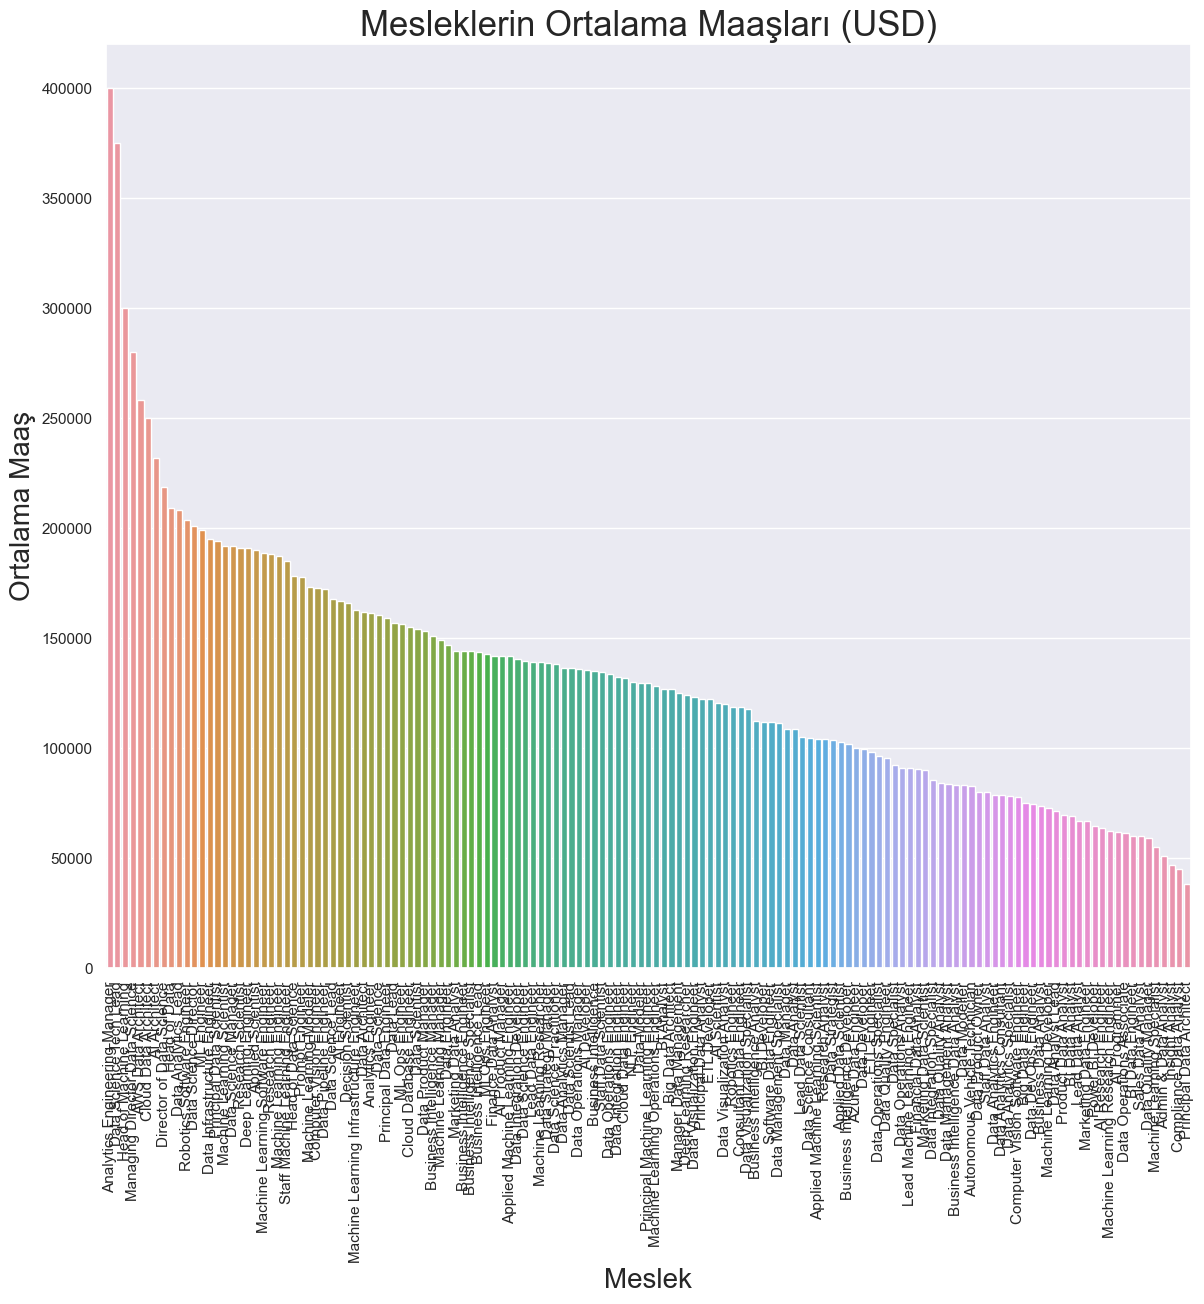

In [23]:
# Mesleklerin ortalama kazançlarına grafikte bakabiliriz.
sns.set()
job_salary_usd = salaries[['job_title', 'salary_in_usd']]
job_salary_usd  = salaries.groupby('job_title').agg({'salary_in_usd': 'mean'}).sort_values('salary_in_usd', ascending=False).reset_index()
fig = plt.figure(figsize=(14,12))
sns.barplot(x='job_title',
            y='salary_in_usd',
            data=job_salary_usd,
            ci=None)
plt.ylabel("Ortalama Maaş", size=20)
plt.xlabel('Meslek', size=20)
plt.xticks(rotation=90)
plt.title("Mesleklerin Ortalama Maaşları (USD)", size=25);

Daha önce korelasyon matrisini oluşturduğumuz dataframe'e bir de görsel olarak bakalım

C:\Users\pc\AppData\Local\Temp\ipykernel_720\271758298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salaries.corr());


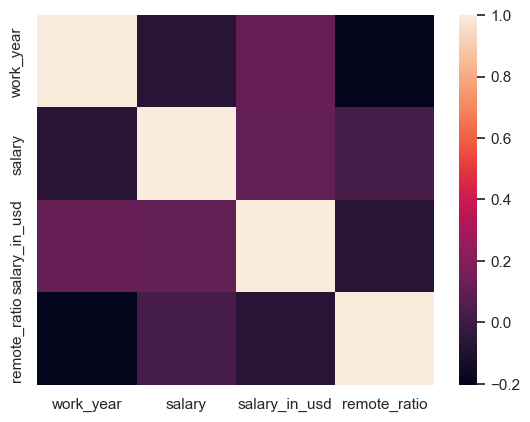

In [24]:
# Numeric değişkenlerin korelasyonunun ısı haritasıyla gösterimi
sns.heatmap(salaries.corr());

Pairplot, verisetindeki numerik değişkenleri ikili gruplar halinde eşleştirerek grafikler oluşturur.

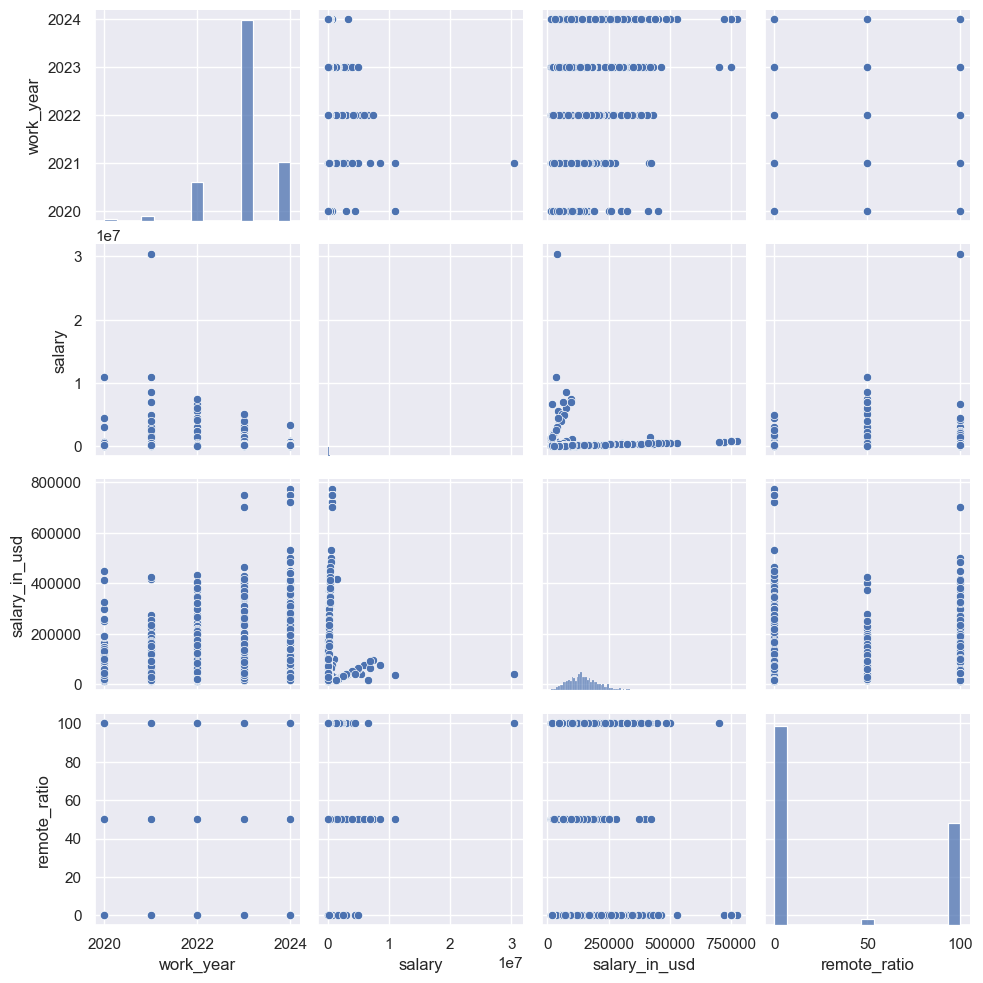

In [25]:
sns.pairplot(salaries)

Displot ile değişkenlerin dağılım grafiğine bakabiliriz.

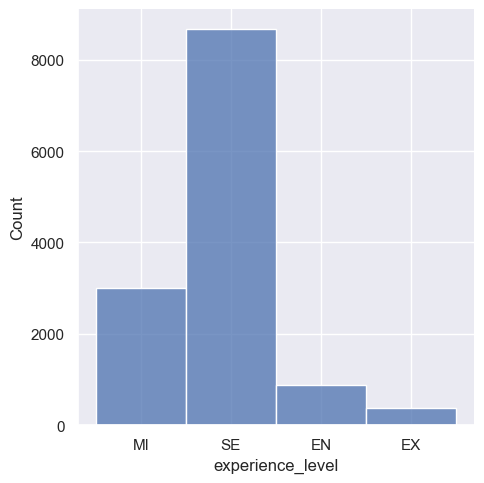

In [26]:
sns.displot(x='experience_level', data=salaries)

Boxplot ile aykırı değerleri gözlemleyebiliriz.

<Axes: >

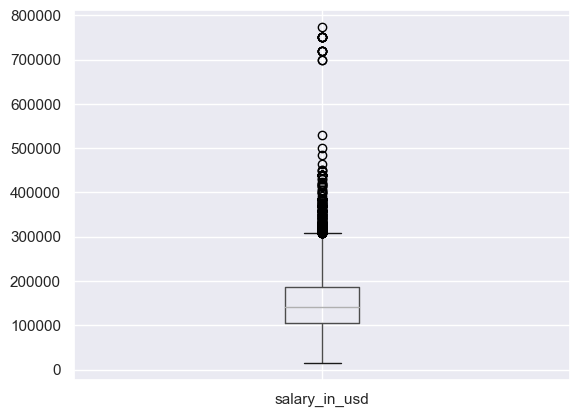

In [27]:
salaries.boxplot('salary_in_usd')